In [164]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


# Getting AR model 

**Generate white noise:** 
White noise is a sequence of random variables drawn from normal distribution with mean zero and variance one.

**Initialize the time series with zeros:** 
Initializes time series with zeros

**Set initial values:** 
It sets initial values of the time series. Since AR-model of order 'p' requires the previous 'p' values to generate the next value, the initial 'p' values are set 
randomly with constant term 'c'

**Generate values for the AR(p) process:**
Using the formula:
**yt[i] = c + phi * yt[i - 1] + eps[i]**,
the function computes values for the autoregressive process. Each value is dependent on the previous 'p' values and white noise.


In [165]:
def get_ar_model(c, p, n, phi, burnin=0):
    # Generate white noise
    eps = np.random.normal()
    # Initialize the time series with zeros
    yt = np.zeros(n + burnin)
    # Set initial values
    for i in range(p):
        yt[i] = c + eps
    # Generate values for the AR(p) process
    for i in range(p, n + burnin):
        yt[i] = c + phi*yt[i - p:i] + eps
    return yt[burnin:]

In [166]:
def plot_acf_pacf(data, lags=40):
    fig, ax = plt.subplots(2, figsize=(8, 6))
    sm.graphics.tsa.plot_acf(data, lags=lags, ax=ax[0], zero=False)
    sm.graphics.tsa.plot_pacf(data, lags=lags, ax=ax[1], zero=False)
    ax[0].set_title('Autocorrection Function (ACF)')
    ax[1].set_title('Partial Autocorrection Function (PACF)')
    plt.tight_layout()
    plt.show()


In [167]:
n = 5000
yt_ar1 = get_ar_model(c=18, p=1, n=n, phi=0.6)

In [168]:
def calculate_acf_pacf(data, lags=60):
    acf_values = sm.tsa.acf(data, nlags=lags)
    pacf_values = sm.tsa.pacf(data, nlags=lags)
    return acf_values, pacf_values


calculate_acf_pacf(yt_ar1)

(array([ 1.00000000e+00,  5.99999840e-01,  3.59999680e-01,  2.15999520e-01,
         1.29599359e-01,  7.77591994e-02,  4.66550392e-02,  2.79924791e-02,
         1.67948790e-02,  1.00762548e-02,  6.04501632e-03,  3.62620915e-03,
         2.17486080e-03,  1.30398774e-03,  7.81399848e-04,  4.67783063e-04,
         2.79548941e-04,  1.66544417e-04,  9.86776508e-05,  5.78935401e-05,
         3.33590224e-05,  1.85742605e-05,  9.63935213e-06,  4.21435587e-06,
         8.95306879e-07, -1.16017376e-06, -2.45751338e-06, -3.29996840e-06,
        -3.86949265e-06, -4.27525844e-06, -4.58276915e-06, -4.83132683e-06,
        -5.04451267e-06, -5.23647542e-06, -5.41570430e-06, -5.58729288e-06,
        -5.75429726e-06, -5.91855114e-06, -6.08115470e-06, -6.24276808e-06,
        -6.40378735e-06, -6.56445015e-06, -6.72489907e-06, -6.88521967e-06,
        -7.04546327e-06, -7.20566067e-06, -7.36583035e-06, -7.52598340e-06,
        -7.68612647e-06, -7.84626355e-06, -8.00639704e-06, -8.16652838e-06,
        -8.3

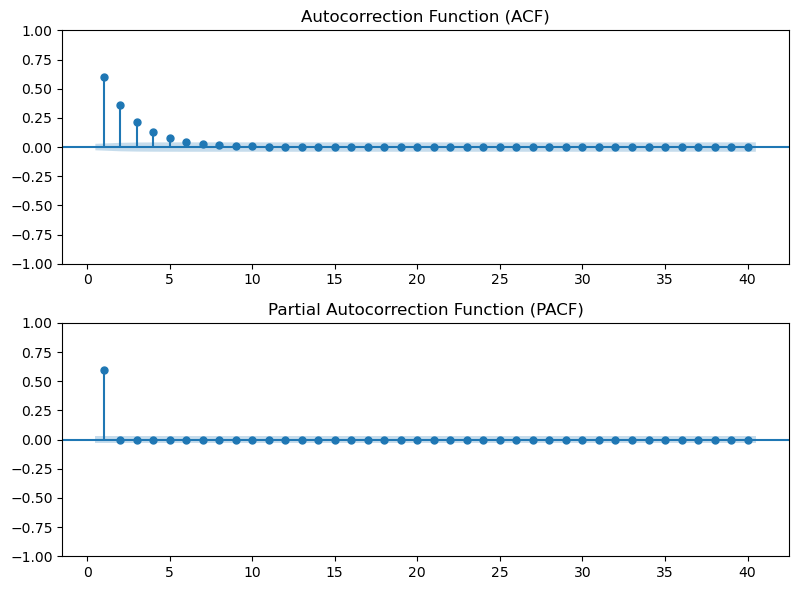

In [169]:
plot_acf_pacf(yt_ar1)

For phi = -0.7:


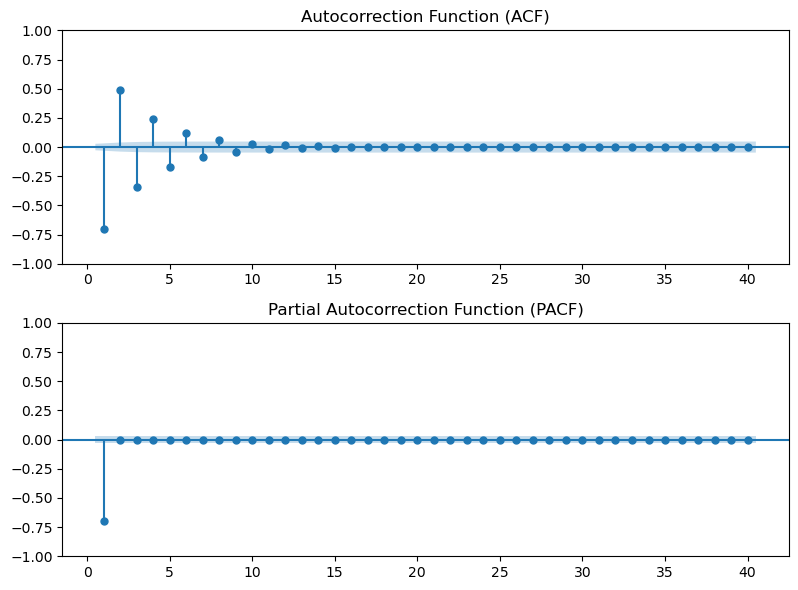

For phi = -0.8:


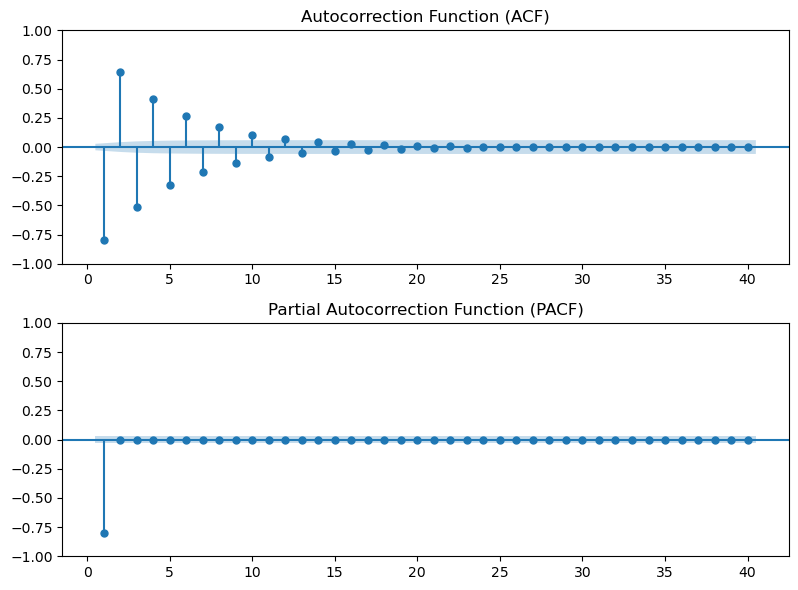

For phi = -0.9:


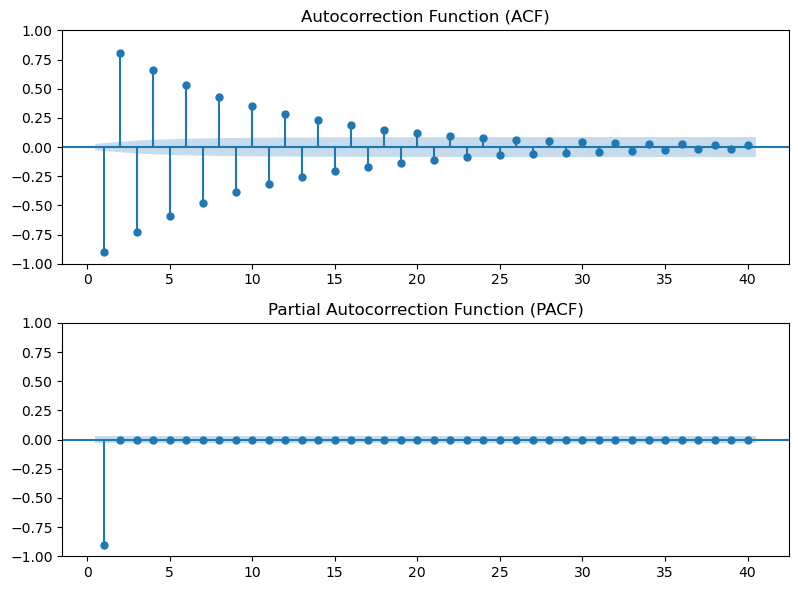

In [170]:
phis = [-0.7, -0.8, -0.9]
for phi in phis:
    yt_ar1 = get_ar_model(c=18, p=1, n=n, phi=phi)
    print(f"For phi = {phi}:")
    plot_acf_pacf(yt_ar1)

In [171]:
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.stattools import adfuller, kpss

In [172]:
import warnings

warnings.filterwarnings("ignore")

# Are time series stationary or non-stationary?

***Augmented Dickey-Fuller (ADF) Test:***

> - Null Hypothesis (H0): The time series has a unit root, indicating it is non-stationary.
> - Alternative Hypothesis (H1): The time series does not have a unit root, indicating it is stationary.
> - If the p-value obtained from the test is less than a chosen significance level (typically 0.05), we reject the null hypothesis. In other words, if p-value < 0.05, we can consider the series as stationary; otherwise, we fail to reject the null hypothesis, suggesting that the series is non-stationary.
Example interpretation:

 - If adf_result[1] < 0.05, then the series is likely stationary.
 - If adf_result[1] >= 0.05, then the series is likely non-stationary.

***KPSS Test:***

> - Null Hypothesis (H0): The time series is stationary around a deterministic trend.
> - Alternative Hypothesis (H1): The time series has a unit root, indicating it is non-stationary.
> - If the p-value obtained from the test is less than a chosen significance level (typically 0.05), we reject the null hypothesis. In other words, if p-value < 0.05, we consider the series as non-stationary; otherwise, we fail to reject the null hypothesis, suggesting that the series is stationary.
Example interpretation:

 - If kpss_result[1] < 0.05, then the series is likely non-stationary.
 - If kpss_result[1] >= 0.05, then the series is likely stationary.

In [173]:
phis = [-0.7, -0.8, -0.9, 1]

for phi in phis:
    model = get_ar_model(c=18, p=1, n=n, phi=phi)
    ljung_box = acorr_ljungbox(model, lags=[40], return_df=True)
    adf_result = adfuller(model)
    kpss_result = kpss(model)

    if adf_result[1] < 0.05 or kpss_result[1] > 0.05:
        print("The time series for phi =", phi, "is stationary.")
    else:
        print("The time series for phi =", phi, "is non-stationary.")




The time series for phi = -0.7 is stationary.
The time series for phi = -0.8 is stationary.
The time series for phi = -0.9 is stationary.
The time series for phi = 1 is non-stationary.


****When phi>=1 then our series is non-stationary****

In [174]:
def get_ma_model1(c, n, q, theta, burnin=0):
    eps = np.random.normal(size=n + burnin)
    ma_model = np.zeros(n + burnin)
    for t in range(q, n + burnin):
        ma_model[t] = c + eps[t] + theta * eps[t - q:t]
    return ma_model[burnin:]

def get_ma_model2(n, q, theta, burnin=0):
    eps = np.random.normal(size=n + burnin)
    ma_model = np.zeros(n + burnin)
    for t in range(q, n + burnin):
        ma_model[t] = eps[t] - eps[t - q] + theta * eps[t - q]
    return ma_model[burnin:]


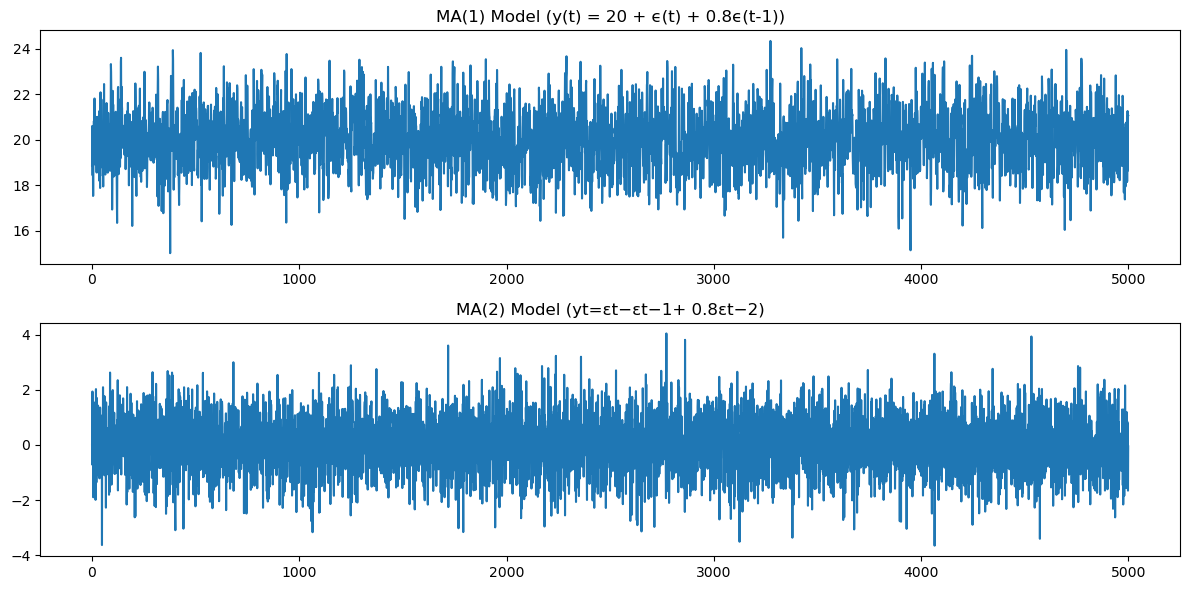

In [175]:
# Generate MA(1) model
ma1_data = get_ma_model1(20, 5000, 1, 0.8,100)
# Generate MA(2) model
ma2_data2 = get_ma_model2(5000, 1, 0.8)
# Plot MA(1) and MA(2) time series
fig, ax = plt.subplots(2, figsize=(12, 6))
ax[0].plot(ma1_data)
ax[0].set_title('MA(1) Model (y(t) = 20 + ϵ(t) + 0.8ϵ(t-1))')
ax[1].plot(ma2_data2)
ax[1].set_title('MA(2) Model (yt=εt−εt−1+ 0.8εt−2)')
plt.tight_layout()
plt.show()

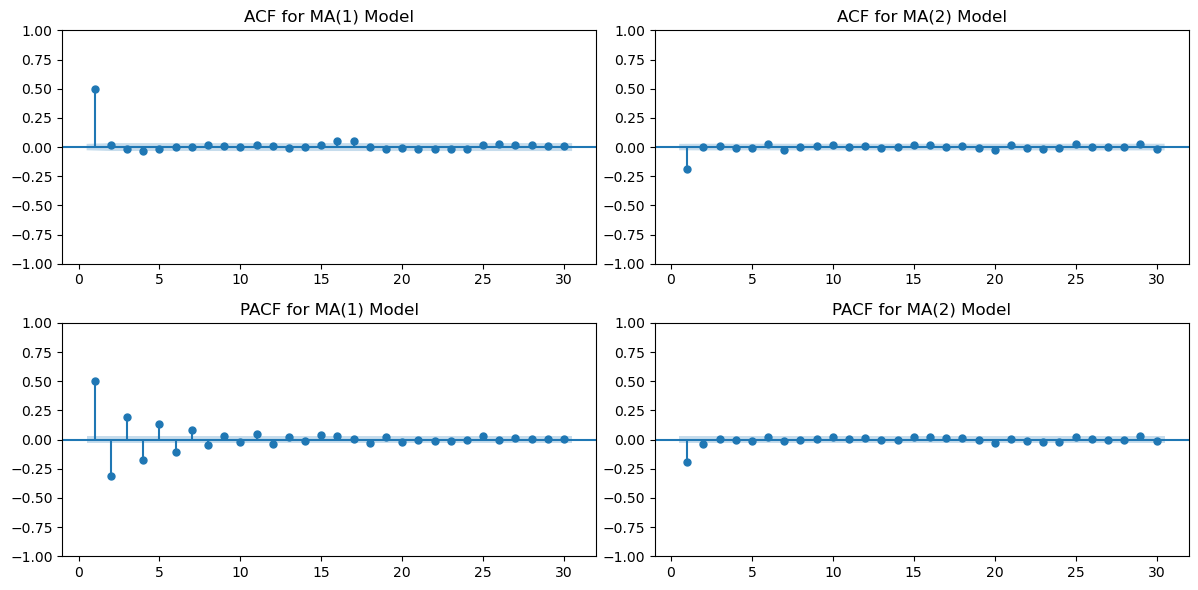

In [176]:
# Calculate ACF and PACF for MA(1) model
fig, ax = plt.subplots(2, 2, figsize=(12, 6))
plot_acf(ma1_data, lags=30, title='ACF for MA(1) Model', ax=ax[0, 0], zero=False)
plot_pacf(ma1_data, lags=30, title='PACF for MA(1) Model', ax=ax[1, 0], zero=False)
plot_acf(ma2_data2, lags=30, title='ACF for MA(2) Model', ax=ax[0, 1], zero=False)
plot_pacf(ma2_data2, lags=30, title='PACF for MA(2) Model', ax=ax[1, 1], zero=False)
plt.tight_layout()
plt.show()

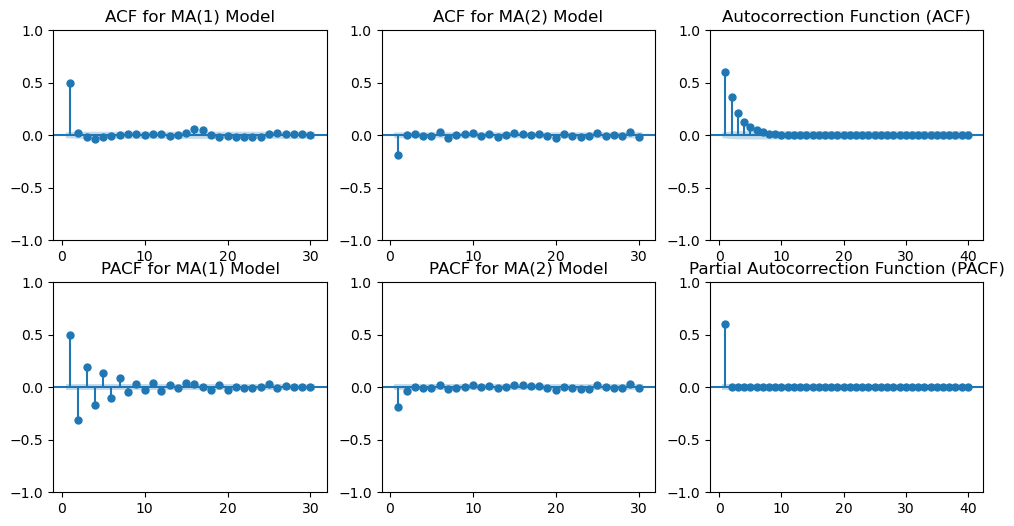

In [177]:
fig, ax = plt.subplots(2, 3, figsize=(12, 6))
ar_model = get_ar_model(c=18, p=1, n=n, phi=0.6)
plot_acf(ma1_data, lags=30, title='ACF for MA(1) Model', ax=ax[0, 0], zero=False);
plot_pacf(ma1_data, lags=30, title='PACF for MA(1) Model', ax=ax[1, 0], zero=False);
plot_acf(ma2_data2, lags=30, title='ACF for MA(2) Model', ax=ax[0, 1], zero=False);
plot_pacf(ma2_data2, lags=30, title='PACF for MA(2) Model', ax=ax[1, 1], zero=False);
plot_acf(ar_model, lags=40,title='Autocorrection Function (ACF)', ax=ax[0,2], zero= False);
plot_pacf(ar_model, lags=40,title='Partial Autocorrection Function (PACF)', ax=ax[1,2], zero= False);